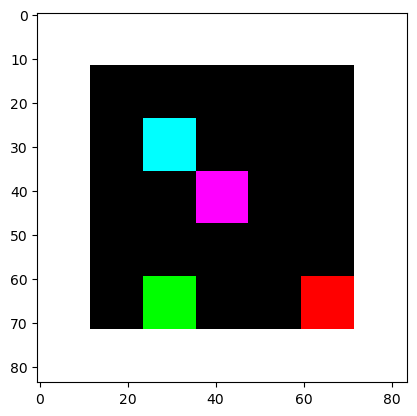

In [1]:
import numpy as np
import pandas as pd
import time
import random
import copy
import torch
import torch.nn as nn
from agent import *
from selection import *
from utils import *
from model import *
from simulation import *
from simulation_Coins import *
from component import Coins
from main import Config
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt 
from skimage.color import rgb2gray
import pickle

## Hyperparameters

In [2]:
IMAGE_SIZE = 5
INPUT_IMAGE_DIM = 7
OUT_SIZE = 4
HIDDEN_SIZE = 128
LEARNING_RATE = 0.0005
EPSILON_DECAY = 0.9999
MIN_EPSILON = 0.1
N_STEPS = 20000
TOTAL_EPISODES = 200
PERFORMANCE_SAVE_INTERVAL = 20
BATCH_SIZE = 64
STEP_SIZE = 5
GAMMA = 0.99

MEMORY_SIZE = 100000
TARGET_UPDATE_TIMES = 10000
UPDATE_TIMES = 5
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

agents_dict = {'agent1': {}, 'agent2': {}}

config = {
    'reward': None, 
    'sucker': None, 
    'temptation': None, 
    'punishment': None, 
    'n_episodes': N_STEPS, 
    'discount': GAMMA,
    'play_epsilon': 1,
    'select_epsilon': None,
    'epsilon_decay': EPSILON_DECAY,
    'min_epsilon': MIN_EPSILON,
    'alpha': None,
    'n_actions': 4,
    'h': STEP_SIZE,
    'select_h': None,
    'state_repr': None,
    'batch_size': BATCH_SIZE,
    'learning_rate': LEARNING_RATE,
}

config = Config(config)

In [18]:
import dill
def save_obj(obj, name):
    with open('./data/objects/' + name + '.pkl', 'wb') as f:
        dill.dump(obj, f, pickle.HIGHEST_PROTOCOL)

agent1: DuelDQN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (lstm): LSTM(128, 128, batch_first=True)
  (relu): ReLU()
  (adv): Linear(in_features=128, out_features=4, bias=True)
  (val): Linear(in_features=128, out_features=1, bias=True)
)
agent2: DuelDQN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (lstm): LSTM(128, 128, batch_first=True)
  (relu): ReLU()
  (adv): Linear(in_features=128, out_features=4, bias=True)
  (val): Linear(in_features=128, out_features=1, bias=True)
)


  0%|                                                   | 0/200 [00:00<?, ?it/s]

Episode: 0


  0%|▏                                       | 1/200 [01:44<5:45:18, 104.11s/it]

[-199.7699999999972, -129.8699999999982]
Episode: 1


  1%|▍                                       | 2/200 [03:28<5:43:35, 104.12s/it]

[-199.66999999999723, -172.3299999999977]
Episode: 2


  2%|▌                                       | 3/200 [05:13<5:43:10, 104.52s/it]

[-199.47999999999723, -198.4699999999973]
Episode: 3


  2%|▊                                       | 4/200 [06:58<5:41:48, 104.63s/it]

[-193.6799999999974, -198.3899999999973]
Episode: 4


  2%|█                                       | 5/200 [08:42<5:40:16, 104.70s/it]

[-169.72999999999786, -198.35999999999726]
Episode: 5


  3%|█▏                                      | 6/200 [10:28<5:39:22, 104.96s/it]

[-198.99999999999724, -197.73999999999734]
Episode: 6


  4%|█▍                                      | 7/200 [12:14<5:38:26, 105.21s/it]

[-178.59999999999755, -196.7799999999974]
Episode: 7


  4%|█▌                                      | 8/200 [14:00<5:37:25, 105.45s/it]

[-181.0999999999974, -188.54999999999782]
Episode: 8


  4%|█▊                                      | 9/200 [15:46<5:36:35, 105.73s/it]

[-180.54999999999777, -189.85999999999777]
Episode: 9


  5%|█▉                                     | 10/200 [17:32<5:35:38, 105.99s/it]

[-194.7399999999975, -187.7299999999979]
Episode: 10


  6%|██▏                                    | 11/200 [19:19<5:34:32, 106.21s/it]

[-177.8499999999978, -195.1599999999974]
Episode: 11


  6%|██▎                                    | 12/200 [21:06<5:33:28, 106.43s/it]

[-162.25999999999812, -182.30999999999818]
Episode: 12


  6%|██▌                                    | 13/200 [22:53<5:32:18, 106.62s/it]

[-181.24999999999784, -173.33999999999864]
Episode: 13


  7%|██▋                                    | 14/200 [24:47<5:37:19, 108.82s/it]

[-177.53999999999766, -192.95999999999756]
Episode: 14


  8%|██▉                                    | 15/200 [26:35<5:34:40, 108.54s/it]

[-193.82999999999754, -187.2599999999979]
Episode: 15


  8%|███                                    | 16/200 [28:23<5:32:15, 108.34s/it]

[-168.49999999999767, -165.11999999999898]
Episode: 16


  8%|███▎                                   | 17/200 [30:11<5:30:08, 108.24s/it]

[-190.50999999999775, -171.69999999999877]
Episode: 17


  9%|███▌                                   | 18/200 [31:59<5:28:36, 108.33s/it]

[-187.12999999999766, -170.06999999999834]
Episode: 18


 10%|███▋                                   | 19/200 [33:48<5:27:29, 108.56s/it]

[-183.4699999999979, -168.01999999999862]
Episode: 19
[-191.99999999999767, -173.93999999999863]


 10%|███▉                                   | 20/200 [35:40<5:28:22, 109.46s/it]

Episode: 20


 10%|████                                   | 21/200 [37:30<5:26:39, 109.49s/it]

[-185.91999999999803, -149.10999999999927]
Episode: 21


 11%|████▎                                  | 22/200 [39:19<5:25:11, 109.61s/it]

[-174.8399999999983, -154.2299999999992]
Episode: 22


 12%|████▍                                  | 23/200 [41:10<5:23:52, 109.79s/it]

[-180.9399999999983, -160.0099999999992]
Episode: 23


 12%|████▋                                  | 24/200 [43:00<5:22:41, 110.01s/it]

[-185.69999999999803, -162.67999999999876]
Episode: 24


 12%|████▉                                  | 25/200 [44:51<5:21:39, 110.28s/it]

[-189.83999999999773, -164.15999999999858]
Episode: 25


 13%|█████                                  | 26/200 [46:42<5:20:29, 110.52s/it]

[-185.90999999999798, -171.37999999999835]
Episode: 26


 14%|█████▎                                 | 27/200 [48:33<5:19:09, 110.69s/it]

[-162.93999999999875, -133.95999999999887]
Episode: 27


 14%|█████▍                                 | 28/200 [50:25<5:18:03, 110.95s/it]

[-164.61999999999915, -97.00000000000001]
Episode: 28


 14%|█████▋                                 | 29/200 [52:16<5:16:41, 111.12s/it]

[-169.98999999999893, -122.11000000000024]
Episode: 29


 15%|█████▊                                 | 30/200 [54:14<5:20:47, 113.22s/it]

[-157.7899999999991, -126.24999999999957]
Episode: 30


 16%|██████                                 | 31/200 [56:07<5:18:03, 112.92s/it]

[-180.15999999999786, -160.77999999999926]
Episode: 31


 16%|██████▏                                | 32/200 [57:59<5:15:57, 112.84s/it]

[-146.41999999999933, -83.44999999999986]
Episode: 32


 16%|██████▍                                | 33/200 [59:52<5:14:17, 112.92s/it]

[-170.91999999999868, -133.12999999999957]
Episode: 33


 17%|██████▎                              | 34/200 [1:01:46<5:12:46, 113.05s/it]

[-158.22999999999877, -121.75999999999866]
Episode: 34


 18%|██████▍                              | 35/200 [1:03:39<5:10:57, 113.08s/it]

[-163.66999999999882, -139.92999999999984]
Episode: 35


 18%|██████▋                              | 36/200 [1:05:33<5:09:37, 113.28s/it]

[-172.01999999999876, -142.60999999999973]
Episode: 36


 18%|██████▊                              | 37/200 [1:07:27<5:08:16, 113.47s/it]

[-165.88999999999913, -134.2400000000001]
Episode: 37


 19%|███████                              | 38/200 [1:09:21<5:06:53, 113.66s/it]

[-183.31999999999812, -148.4299999999998]
Episode: 38


 20%|███████▏                             | 39/200 [1:11:15<5:05:49, 113.97s/it]

[-189.99999999999773, -178.15999999999843]
Episode: 39
[-165.44999999999828, -152.37999999999903]


 20%|███████▍                             | 40/200 [1:13:12<5:06:17, 114.86s/it]

Episode: 40


 20%|███████▌                             | 41/200 [1:15:08<5:04:39, 114.97s/it]

[-171.24999999999866, -135.01999999999944]
Episode: 41


 21%|███████▊                             | 42/200 [1:17:03<5:02:53, 115.02s/it]

[-151.45999999999975, -111.32000000000023]
Episode: 42


 22%|███████▉                             | 43/200 [1:18:58<5:01:23, 115.18s/it]

[-149.28999999999934, -106.02000000000025]
Episode: 43


 22%|████████▏                            | 44/200 [1:20:54<5:00:02, 115.40s/it]

[-146.38999999999956, -109.49999999999997]
Episode: 44


 22%|████████▎                            | 45/200 [1:22:50<4:58:26, 115.53s/it]

[-154.85999999999908, -128.49999999999991]
Episode: 45


 23%|████████▌                            | 46/200 [1:24:52<5:01:27, 117.45s/it]

[-183.08999999999813, -162.51999999999873]
Episode: 46


 24%|████████▋                            | 47/200 [1:26:49<4:58:53, 117.21s/it]

[-166.68999999999897, -131.62999999999988]
Episode: 47


 24%|████████▉                            | 48/200 [1:28:46<4:56:43, 117.13s/it]

[-158.33999999999952, -127.85999999999959]
Episode: 48


 24%|█████████                            | 49/200 [1:30:43<4:54:49, 117.15s/it]

[-167.6999999999985, -131.59999999999906]
Episode: 49


 25%|█████████▎                           | 50/200 [1:32:41<4:53:26, 117.37s/it]

[-161.80999999999852, -168.06999999999863]
Episode: 50


 26%|█████████▍                           | 51/200 [1:34:39<4:52:24, 117.75s/it]

[-116.37999999999974, -60.939999999999586]
Episode: 51


 26%|█████████▌                           | 52/200 [1:36:38<4:51:16, 118.09s/it]

[-129.96999999999963, -76.26999999999978]
Episode: 52


 26%|█████████▊                           | 53/200 [1:38:36<4:49:22, 118.11s/it]

[-166.1899999999991, -129.70999999999944]
Episode: 53


 27%|█████████▉                           | 54/200 [1:40:35<4:47:45, 118.26s/it]

[-160.7199999999987, -97.54999999999902]
Episode: 54


 28%|██████████▏                          | 55/200 [1:42:34<4:46:12, 118.43s/it]

[-181.07999999999828, -164.3999999999988]
Episode: 55


 28%|██████████▎                          | 56/200 [1:44:33<4:44:37, 118.60s/it]

[-129.76999999999913, -85.22999999999935]
Episode: 56


 28%|██████████▌                          | 57/200 [1:46:33<4:43:47, 119.07s/it]

[-150.09999999999894, -125.50999999999942]
Episode: 57


 29%|██████████▋                          | 58/200 [1:48:33<4:42:13, 119.25s/it]

[-113.48999999999933, -110.2999999999992]
Episode: 58


 30%|██████████▉                          | 59/200 [1:50:33<4:40:45, 119.47s/it]

[-165.60999999999868, -152.60999999999922]
Episode: 59
[-130.86999999999915, -130.85999999999984]


 30%|███████████                          | 60/200 [1:52:36<4:41:51, 120.79s/it]

Episode: 60


 30%|███████████▎                         | 61/200 [1:54:42<4:43:26, 122.35s/it]

[-138.09999999999943, -92.37999999999974]
Episode: 61


 31%|███████████▍                         | 62/200 [1:56:43<4:40:06, 121.79s/it]

[-165.05999999999898, -125.36999999999962]
Episode: 62


 32%|███████████▋                         | 63/200 [1:58:44<4:37:25, 121.50s/it]

[-136.46999999999963, -118.99000000000017]
Episode: 63


 32%|███████████▊                         | 64/200 [2:00:45<4:35:09, 121.40s/it]

[-128.92999999999955, -100.30000000000015]
Episode: 64


 32%|████████████                         | 65/200 [2:02:46<4:33:01, 121.35s/it]

[-138.99999999999952, -122.13999999999962]
Episode: 65


 33%|████████████▏                        | 66/200 [2:04:47<4:31:01, 121.36s/it]

[-103.59999999999964, -58.99999999999975]
Episode: 66


 34%|████████████▍                        | 67/200 [2:06:50<4:29:32, 121.60s/it]

[-115.61000000000006, -68.96000000000018]
Episode: 67


 34%|████████████▌                        | 68/200 [2:08:52<4:28:11, 121.90s/it]

[-140.24999999999926, -130.53999999999968]
Episode: 68


 34%|████████████▊                        | 69/200 [2:10:55<4:26:50, 122.21s/it]

[-132.27999999999926, -85.12999999999934]
Episode: 69


 35%|████████████▉                        | 70/200 [2:12:58<4:24:54, 122.27s/it]

[-163.34999999999854, -141.19999999999956]
Episode: 70


 36%|█████████████▏                       | 71/200 [2:15:01<4:23:37, 122.62s/it]

[-128.35999999999942, -93.75999999999944]
Episode: 71


 36%|█████████████▎                       | 72/200 [2:17:05<4:22:25, 123.01s/it]

[-127.00999999999958, -68.43999999999937]
Episode: 72


 36%|█████████████▌                       | 73/200 [2:19:08<4:20:39, 123.15s/it]

[-101.8999999999993, -31.15999999999932]
Episode: 73


 37%|█████████████▋                       | 74/200 [2:21:12<4:18:59, 123.33s/it]

[-103.88999999999949, -25.879999999999182]
Episode: 74


 38%|█████████████▉                       | 75/200 [2:23:17<4:18:05, 123.88s/it]

[-135.21999999999903, -95.94999999999906]
Episode: 75


 38%|██████████████                       | 76/200 [2:25:23<4:17:07, 124.42s/it]

[-166.1299999999986, -165.15999999999892]
Episode: 76


 38%|██████████████▏                      | 77/200 [2:27:28<4:15:10, 124.48s/it]

[-94.5499999999997, -48.66000000000006]
Episode: 77


 39%|██████████████▍                      | 78/200 [2:29:32<4:13:10, 124.51s/it]

[-111.65999999999936, -72.58999999999929]
Episode: 78


 40%|██████████████▌                      | 79/200 [2:31:38<4:11:41, 124.80s/it]

[-133.24999999999935, -81.20999999999955]
Episode: 79
[-112.36999999999948, -70.0399999999996]


 40%|██████████████▊                      | 80/200 [2:33:47<4:12:07, 126.06s/it]

Episode: 80


 40%|██████████████▉                      | 81/200 [2:35:52<4:09:42, 125.90s/it]

[-132.70999999999992, -109.32000000000043]
Episode: 81


 41%|███████████████▏                     | 82/200 [2:37:58<4:07:46, 125.99s/it]

[-98.89999999999979, -44.84999999999975]
Episode: 82


 42%|███████████████▎                     | 83/200 [2:40:05<4:05:46, 126.04s/it]

[-141.61000000000018, -91.77000000000038]
Episode: 83


 42%|███████████████▌                     | 84/200 [2:42:11<4:04:01, 126.22s/it]

[-87.61999999999966, -23.199999999999466]
Episode: 84


 42%|███████████████▋                     | 85/200 [2:44:18<4:02:17, 126.41s/it]

[-106.04999999999976, -39.089999999999314]
Episode: 85


 43%|███████████████▉                     | 86/200 [2:46:26<4:00:51, 126.77s/it]

[-94.0699999999996, -16.559999999999597]
Episode: 86


 44%|████████████████                     | 87/200 [2:48:33<3:59:16, 127.05s/it]

[-111.10999999999986, -45.4799999999996]
Episode: 87


 44%|████████████████▎                    | 88/200 [2:50:41<3:57:44, 127.36s/it]

[-112.37999999999968, -60.29999999999965]
Episode: 88


 44%|████████████████▍                    | 89/200 [2:52:49<3:55:45, 127.44s/it]

[-120.44999999999932, -59.959999999999035]
Episode: 89


 45%|████████████████▋                    | 90/200 [2:55:03<3:57:16, 129.42s/it]

[-87.90999999999977, -42.77999999999976]
Episode: 90


 46%|████████████████▊                    | 91/200 [2:57:12<3:54:34, 129.13s/it]

[-129.2399999999996, -100.72999999999962]
Episode: 91


 46%|█████████████████                    | 92/200 [2:59:20<3:52:02, 128.91s/it]

[-118.69999999999989, -89.2500000000002]
Episode: 92


 46%|█████████████████▏                   | 93/200 [3:01:29<3:50:01, 128.99s/it]

[-95.31999999999954, -56.24999999999966]
Episode: 93


 47%|█████████████████▍                   | 94/200 [3:03:38<3:48:02, 129.08s/it]

[-92.91999999999977, -32.18999999999943]
Episode: 94


 48%|█████████████████▌                   | 95/200 [3:05:49<3:46:36, 129.49s/it]

[-125.93999999999896, -72.5499999999985]
Episode: 95


 48%|█████████████████▊                   | 96/200 [3:07:59<3:44:47, 129.69s/it]

[-49.200000000000124, 30.090000000000845]
Episode: 96


 48%|█████████████████▉                   | 97/200 [3:10:09<3:42:53, 129.84s/it]

[-81.95999999999977, -25.84999999999917]
Episode: 97


 49%|██████████████████▏                  | 98/200 [3:12:19<3:40:53, 129.93s/it]

[-36.54000000000046, 29.91000000000019]
Episode: 98


 50%|██████████████████▎                  | 99/200 [3:14:30<3:39:04, 130.14s/it]

[-92.66000000000012, -36.80000000000033]
Episode: 99
[-87.16999999999965, -31.059999999999462]


 50%|██████████████████                  | 100/200 [3:16:45<3:39:28, 131.69s/it]

Episode: 100


 50%|██████████████████▏                 | 101/200 [3:18:56<3:36:44, 131.36s/it]

[-52.739999999999895, 10.650000000001041]
Episode: 101


 51%|██████████████████▎                 | 102/200 [3:21:07<3:34:29, 131.32s/it]

[-125.67999999999991, -97.49000000000032]
Episode: 102


 52%|██████████████████▌                 | 103/200 [3:23:20<3:33:00, 131.75s/it]

[-93.79999999999993, -42.02999999999975]
Episode: 103


 52%|██████████████████▋                 | 104/200 [3:25:32<3:31:03, 131.91s/it]

[-106.02000000000066, -51.71000000000073]
Episode: 104


 52%|██████████████████▉                 | 105/200 [3:27:44<3:28:53, 131.93s/it]

[-65.04000000000029, -6.849999999999514]
Episode: 105


 53%|███████████████████                 | 106/200 [3:29:56<3:26:48, 132.01s/it]

[-49.24999999999979, 31.42000000000139]
Episode: 106


 54%|███████████████████▎                | 107/200 [3:32:09<3:24:51, 132.17s/it]

[-37.779999999999674, 46.07000000000169]
Episode: 107


 54%|███████████████████▍                | 108/200 [3:34:22<3:22:59, 132.39s/it]

[-91.39000000000001, -27.95999999999963]
Episode: 108


 55%|███████████████████▌                | 109/200 [3:36:36<3:21:25, 132.81s/it]

[-91.42000000000027, -48.93999999999993]
Episode: 109


 55%|███████████████████▊                | 110/200 [3:38:49<3:19:28, 132.98s/it]

[-110.1799999999998, -58.569999999999915]
Episode: 110


 56%|███████████████████▉                | 111/200 [3:41:03<3:17:36, 133.22s/it]

[-66.71999999999963, -9.72999999999917]
Episode: 111


 56%|████████████████████▏               | 112/200 [3:43:17<3:15:40, 133.42s/it]

[-117.76999999999944, -94.79999999999968]
Episode: 112


 56%|████████████████████▎               | 113/200 [3:45:31<3:13:53, 133.72s/it]

[-82.0699999999998, -28.599999999999238]
Episode: 113


 57%|████████████████████▌               | 114/200 [3:47:45<3:11:54, 133.89s/it]

[-42.37000000000012, 48.08000000000093]
Episode: 114


 57%|████████████████████▋               | 115/200 [3:50:00<3:09:55, 134.07s/it]

[-104.8599999999994, -57.92999999999948]
Episode: 115


 58%|████████████████████▉               | 116/200 [3:52:15<3:07:58, 134.27s/it]

[-92.3999999999999, -33.22999999999967]
Episode: 116


 58%|█████████████████████               | 117/200 [3:54:36<3:08:33, 136.31s/it]

[-38.16000000000016, 40.5200000000012]
Episode: 117


 59%|█████████████████████▏              | 118/200 [3:56:51<3:06:06, 136.18s/it]

[-117.04999999999954, -79.38999999999979]
Episode: 118


 60%|█████████████████████▍              | 119/200 [3:59:07<3:03:42, 136.08s/it]

[-26.570000000000316, 56.590000000000806]
Episode: 119
[-33.97000000000054, 34.370000000000665]


 60%|█████████████████████▌              | 120/200 [4:01:27<3:03:02, 137.28s/it]

Episode: 120


 60%|█████████████████████▊              | 121/200 [4:03:44<3:00:24, 137.02s/it]

[-81.2599999999998, -34.98999999999914]
Episode: 121


 61%|█████████████████████▉              | 122/200 [4:06:01<2:58:07, 137.02s/it]

[-41.150000000000716, 56.38000000000054]
Episode: 122


 62%|██████████████████████▏             | 123/200 [4:08:18<2:55:49, 137.00s/it]

[5.159999999999582, 126.55000000000146]
Episode: 123


 62%|██████████████████████▎             | 124/200 [4:10:35<2:53:31, 137.00s/it]

[-38.73000000000037, 38.20000000000073]
Episode: 124


 62%|██████████████████████▌             | 125/200 [4:12:52<2:51:27, 137.16s/it]

[-45.03000000000035, 43.87000000000042]
Episode: 125


 63%|██████████████████████▋             | 126/200 [4:15:10<2:49:19, 137.29s/it]

[-57.46000000000017, 5.440000000000512]
Episode: 126


 64%|██████████████████████▊             | 127/200 [4:17:28<2:47:14, 137.46s/it]

[-63.300000000000225, 32.85000000000055]
Episode: 127


 64%|███████████████████████             | 128/200 [4:19:46<2:45:10, 137.65s/it]

[-84.22999999999976, -38.749999999999446]
Episode: 128


 64%|███████████████████████▏            | 129/200 [4:22:05<2:43:18, 138.00s/it]

[-13.58000000000033, 71.87000000000057]
Episode: 129


 65%|███████████████████████▍            | 130/200 [4:24:29<2:43:13, 139.91s/it]

[-95.37999999999961, -24.499999999998995]
Episode: 130


 66%|███████████████████████▌            | 131/200 [4:26:48<2:40:39, 139.71s/it]

[-36.22000000000038, 47.64000000000075]
Episode: 131


 66%|███████████████████████▊            | 132/200 [4:29:07<2:38:04, 139.48s/it]

[-52.31000000000033, 12.610000000000083]
Episode: 132


 66%|███████████████████████▉            | 133/200 [4:31:27<2:35:58, 139.68s/it]

[-44.9800000000002, 22.41000000000077]
Episode: 133


 67%|████████████████████████            | 134/200 [4:33:47<2:33:32, 139.58s/it]

[-64.47000000000031, 24.87000000000041]
Episode: 134


 68%|████████████████████████▎           | 135/200 [4:36:07<2:31:27, 139.81s/it]

[-37.51000000000029, 42.2200000000008]
Episode: 135


 68%|████████████████████████▍           | 136/200 [4:38:28<2:29:22, 140.04s/it]

[-69.79999999999941, -22.40999999999988]
Episode: 136


 68%|████████████████████████▋           | 137/200 [4:40:49<2:27:22, 140.35s/it]

[-47.01999999999994, 19.340000000000998]
Episode: 137


 69%|████████████████████████▊           | 138/200 [4:43:10<2:25:14, 140.55s/it]

[-104.00999999999942, -13.569999999998931]
Episode: 138


 70%|█████████████████████████           | 139/200 [4:45:31<2:23:14, 140.90s/it]

[-57.04000000000057, 7.810000000000623]
Episode: 139
[-60.29000000000043, 1.5000000000002984]


 70%|█████████████████████████▏          | 140/200 [4:47:58<2:22:38, 142.64s/it]

Episode: 140


 70%|█████████████████████████▍          | 141/200 [4:50:20<2:19:52, 142.25s/it]

[-53.65000000000025, -0.8699999999990944]
Episode: 141


 71%|█████████████████████████▌          | 142/200 [4:52:42<2:17:29, 142.23s/it]

[-24.850000000000176, 50.14000000000097]
Episode: 142


 72%|█████████████████████████▋          | 143/200 [4:55:10<2:16:50, 144.05s/it]

[-19.130000000000315, 48.070000000000874]
Episode: 143


 72%|█████████████████████████▉          | 144/200 [4:57:32<2:13:53, 143.45s/it]

[-53.42999999999993, 34.3500000000015]
Episode: 144


 72%|██████████████████████████          | 145/200 [4:59:55<2:11:21, 143.30s/it]

[-23.05000000000016, 65.9100000000011]
Episode: 145


 73%|██████████████████████████▎         | 146/200 [5:02:18<2:08:46, 143.09s/it]

[8.729999999999587, 89.65000000000101]
Episode: 146


 74%|██████████████████████████▍         | 147/200 [5:04:41<2:06:30, 143.21s/it]

[-43.14000000000016, 17.60000000000103]
Episode: 147


 74%|██████████████████████████▋         | 148/200 [5:07:05<2:04:12, 143.32s/it]

[-23.009999999999668, 39.31000000000134]
Episode: 148


 74%|██████████████████████████▊         | 149/200 [5:09:29<2:01:59, 143.52s/it]

[20.63999999999975, 104.24000000000115]
Episode: 149


 75%|███████████████████████████         | 150/200 [5:11:52<1:59:40, 143.62s/it]

[-24.34000000000012, 28.35000000000067]
Episode: 150


 76%|███████████████████████████▏        | 151/200 [5:14:17<1:57:29, 143.86s/it]

[16.380000000000457, 81.46000000000166]
Episode: 151


 76%|███████████████████████████▎        | 152/200 [5:16:42<1:55:23, 144.24s/it]

[6.059999999999809, 73.8900000000011]
Episode: 152


 76%|███████████████████████████▌        | 153/200 [5:19:07<1:53:09, 144.46s/it]

[-17.08000000000036, 67.48000000000073]
Episode: 153


 77%|███████████████████████████▋        | 154/200 [5:21:33<1:51:03, 144.85s/it]

[17.58999999999957, 103.23000000000138]
Episode: 154


 78%|███████████████████████████▉        | 155/200 [5:24:00<1:49:12, 145.60s/it]

[12.030000000000465, 78.7500000000012]
Episode: 155


 78%|████████████████████████████        | 156/200 [5:26:27<1:46:59, 145.89s/it]

[34.419999999999526, 137.5400000000016]
Episode: 156


 78%|████████████████████████████▎       | 157/200 [5:28:53<1:44:35, 145.95s/it]

[30.629999999999654, 119.62000000000134]
Episode: 157


 79%|████████████████████████████▍       | 158/200 [5:31:20<1:42:22, 146.24s/it]

[38.82000000000014, 117.83000000000126]
Episode: 158


 80%|████████████████████████████▌       | 159/200 [5:33:47<1:40:02, 146.41s/it]

[34.5500000000003, 122.14000000000173]
Episode: 159
[0.4100000000001117, 89.09000000000134]


 80%|████████████████████████████▊       | 160/200 [5:36:20<1:38:57, 148.43s/it]

Episode: 160


 80%|████████████████████████████▉       | 161/200 [5:38:46<1:36:05, 147.84s/it]

[-72.57999999999977, -23.509999999999614]
Episode: 161


 81%|█████████████████████████████▏      | 162/200 [5:41:14<1:33:37, 147.83s/it]

[1.349999999999757, 57.8700000000009]
Episode: 162


 82%|█████████████████████████████▎      | 163/200 [5:43:42<1:31:08, 147.81s/it]

[36.629999999999995, 112.50000000000118]
Episode: 163


 82%|█████████████████████████████▌      | 164/200 [5:46:09<1:28:34, 147.62s/it]

[18.090000000000696, 69.04000000000144]
Episode: 164


 82%|█████████████████████████████▋      | 165/200 [5:48:37<1:26:09, 147.70s/it]

[30.13000000000004, 82.70000000000117]
Episode: 165


 83%|█████████████████████████████▉      | 166/200 [5:51:05<1:23:46, 147.83s/it]

[7.160000000000572, 55.520000000001005]
Episode: 166


 84%|██████████████████████████████      | 167/200 [5:53:35<1:21:37, 148.40s/it]

[-26.87999999999995, 23.8600000000008]
Episode: 167


 84%|██████████████████████████████▏     | 168/200 [5:56:03<1:19:12, 148.50s/it]

[-5.910000000000104, 61.870000000001404]
Episode: 168


 84%|██████████████████████████████▍     | 169/200 [5:58:33<1:16:49, 148.70s/it]

[31.200000000000575, 85.39000000000186]
Episode: 169


 85%|██████████████████████████████▌     | 170/200 [6:01:01<1:14:18, 148.61s/it]

[-5.9500000000002995, 52.5900000000007]
Episode: 170


 86%|██████████████████████████████▊     | 171/200 [6:03:30<1:11:57, 148.88s/it]

[40.94000000000024, 108.02000000000149]
Episode: 171


 86%|██████████████████████████████▉     | 172/200 [6:06:01<1:09:39, 149.26s/it]

[-11.389999999999764, 56.23000000000077]
Episode: 172


 86%|███████████████████████████████▏    | 173/200 [6:08:30<1:07:10, 149.27s/it]

[-21.65999999999982, 9.350000000000708]
Episode: 173


 87%|███████████████████████████████▎    | 174/200 [6:11:01<1:04:52, 149.72s/it]

[49.39000000000078, 111.230000000002]
Episode: 174


 88%|███████████████████████████████▌    | 175/200 [6:13:31<1:02:31, 150.04s/it]

[50.810000000000535, 95.4000000000013]
Episode: 175


 88%|███████████████████████████████▋    | 176/200 [6:16:02<1:00:05, 150.21s/it]

[7.560000000000569, 81.26000000000093]
Episode: 176


 88%|█████████████████████████████████▋    | 177/200 [6:18:33<57:39, 150.43s/it]

[27.800000000000285, 94.46000000000164]
Episode: 177


 89%|█████████████████████████████████▊    | 178/200 [6:21:05<55:17, 150.80s/it]

[42.98000000000068, 102.15000000000137]
Episode: 178


 90%|██████████████████████████████████    | 179/200 [6:23:37<52:59, 151.41s/it]

[49.400000000000865, 100.07000000000158]
Episode: 179
[42.380000000000294, 112.18000000000146]


 90%|██████████████████████████████████▏   | 180/200 [6:26:16<51:07, 153.40s/it]

Episode: 180


 90%|██████████████████████████████████▍   | 181/200 [6:28:47<48:25, 152.94s/it]

[3.45000000000025, 52.34000000000109]
Episode: 181


 91%|██████████████████████████████████▌   | 182/200 [6:31:19<45:46, 152.61s/it]

[85.57000000000042, 170.31000000000216]
Episode: 182


 92%|██████████████████████████████████▊   | 183/200 [6:33:51<43:08, 152.26s/it]

[87.96000000000048, 164.68000000000208]
Episode: 183


 92%|██████████████████████████████████▉   | 184/200 [6:36:25<40:44, 152.76s/it]

[9.360000000000573, 68.86000000000172]
Episode: 184


 92%|███████████████████████████████████▏  | 185/200 [6:38:56<38:07, 152.50s/it]

[58.860000000000284, 118.28000000000156]
Episode: 185


 93%|███████████████████████████████████▎  | 186/200 [6:41:29<35:35, 152.51s/it]

[21.890000000000292, 68.15000000000114]
Episode: 186


 94%|███████████████████████████████████▌  | 187/200 [6:44:03<33:08, 152.93s/it]

[2.0000000000006892, 47.98000000000172]
Episode: 187


 94%|███████████████████████████████████▋  | 188/200 [6:46:37<30:38, 153.18s/it]

[-22.559999999999576, 18.140000000001002]
Episode: 188


 94%|███████████████████████████████████▉  | 189/200 [6:49:10<28:05, 153.27s/it]

[67.52000000000073, 102.90000000000131]
Episode: 189


 95%|████████████████████████████████████  | 190/200 [6:51:45<25:36, 153.62s/it]

[54.4100000000005, 117.64000000000154]
Episode: 190


 96%|████████████████████████████████████▎ | 191/200 [6:54:21<23:11, 154.58s/it]

[56.15000000000045, 106.82000000000157]
Episode: 191


 96%|████████████████████████████████████▍ | 192/200 [6:56:56<20:36, 154.51s/it]

[52.71000000000066, 123.16000000000183]
Episode: 192


 96%|████████████████████████████████████▋ | 193/200 [6:59:32<18:04, 154.99s/it]

[44.64000000000008, 118.18000000000134]
Episode: 193


 97%|████████████████████████████████████▊ | 194/200 [7:02:07<15:30, 155.04s/it]

[84.50000000000048, 164.01000000000198]
Episode: 194


 98%|█████████████████████████████████████ | 195/200 [7:04:43<12:56, 155.32s/it]

[83.10000000000085, 148.38000000000187]
Episode: 195


 98%|█████████████████████████████████████▏| 196/200 [7:07:20<10:22, 155.71s/it]

[-26.919999999999494, 31.940000000001362]
Episode: 196


 98%|█████████████████████████████████████▍| 197/200 [7:09:56<07:47, 155.94s/it]

[77.18000000000089, 135.4400000000016]
Episode: 197


 99%|█████████████████████████████████████▌| 198/200 [7:12:32<05:12, 156.06s/it]

[90.92000000000067, 159.38000000000187]
Episode: 198


100%|█████████████████████████████████████▊| 199/200 [7:15:10<02:36, 156.36s/it]

[4.31000000000071, 71.17000000000124]
Episode: 199
[53.82000000000041, 99.81000000000122]


100%|██████████████████████████████████████| 200/200 [7:17:53<00:00, 131.37s/it]

Running time: 26294.898550748825


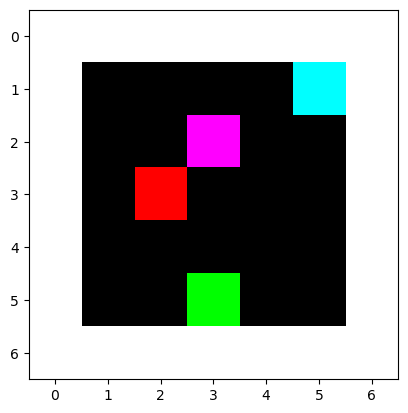

In [3]:
start = time.time()
seed_everything(110)
seeds = [2,3,4,5,6,7,42,43,110,111]
df_result = pd.DataFrame(columns=['episode', 'agent1_reward', 'agent2_reward', 'strategy', 'seed'])

env = Coins(size=IMAGE_SIZE, config=config, image_dim=INPUT_IMAGE_DIM)

agent1 = initialize_agent('agent1', config, input_size=INPUT_IMAGE_DIM)
agent2 = initialize_agent('agent2', config, input_size=INPUT_IMAGE_DIM)

fill_memory(agent1, agent2, env, config)

for ep in tqdm(range(TOTAL_EPISODES)):
    normal_drqn(agent1, agent2, env, config, total_episodes=TOTAL_EPISODES)
    print(f'Episode: {ep}')
    with HiddenPrints():
        for se in seeds:
            frames, agent1_reward, agent2_reward, obj_cnt = test_policy(copy.deepcopy(agent1), copy.deepcopy(agent2), env, se)
            strategy = show_result(agent1_reward, agent2_reward)
            df_result.loc[len(df_result.index)]=[ep, sum(agent1_reward), sum(agent2_reward), strategy, se]
    print(df_result.loc[df_result.episode == ep][['agent1_reward', 'agent2_reward']].mean().tolist())
    if (ep+1) % PERFORMANCE_SAVE_INTERVAL == 0:
        agents_dict['agent1'][ep] = copy.deepcopy(agent1)
        agents_dict['agent2'][ep] = copy.deepcopy(agent2)        
end = time.time()
print(f'Running time: {end-start}')

In [19]:
for k,v in agents_dict['agent1'].items():
    save_obj(v, v.name+'-'+str(k))

for k,v in agents_dict['agent2'].items():
    save_obj(v, v.name+'-'+str(k))

In [20]:
df_result.to_csv('./data/coin_drqn.csv')

agent1.updating_times

### Save Network weights

In [4]:
torch.save(agent1.policy_net.state_dict(), 'data/agent1_normal_drqn_weights_7.torch')
torch.save(agent2.policy_net.state_dict(), 'data/agent2_normal_drqn_weights_7.torch')

In [5]:
agent1_epi = copy.deepcopy(agents_dict['agent1'][99])
agent2_epi = copy.deepcopy(agents_dict['agent2'][99])

df_result_epi = pd.DataFrame(columns=['episode', 'agent1_reward', 'agent2_reward', 'strategy', 'seed'])

for ep in tqdm(range(101)):
    episodic_drqn(agent1_epi, agent2_epi, env, config, total_episodes=101, update_times=UPDATE_TIMES*10)
    print(f'Episode: {ep}')
    with HiddenPrints():
        for se in seeds:
            frames, agent1_reward, agent2_reward, obj_cnt = test_policy(copy.deepcopy(agent1_epi), copy.deepcopy(agent2_epi), env, se)
            strategy = show_result(agent1_reward, agent2_reward)
            df_result_epi.loc[len(df_result_epi.index)]=[ep, sum(agent1_reward), sum(agent2_reward), strategy, se]
    print(df_result_epi.loc[df_result_epi.episode == ep][['agent1_reward', 'agent2_reward']].mean().tolist())


  0%|                                                   | 0/101 [00:00<?, ?it/s]

Episode: 0


  1%|▍                                        | 1/101 [01:19<2:12:09, 79.29s/it]

[-170.9499999999984, -147.96999999999917]
Episode: 1


  2%|▊                                        | 2/101 [02:39<2:11:58, 79.99s/it]

[-153.02999999999875, -135.41999999999925]
Episode: 2


  3%|█▏                                       | 3/101 [04:00<2:11:26, 80.47s/it]

[-142.09999999999985, -89.78000000000029]
Episode: 3


  4%|█▌                                       | 4/101 [05:21<2:10:12, 80.54s/it]

[-118.42999999999941, -103.45000000000009]
Episode: 4


  5%|██                                       | 5/101 [06:42<2:09:10, 80.74s/it]

[-78.6300000000002, 8.48000000000032]
Episode: 5


  6%|██▍                                      | 6/101 [08:00<2:06:31, 79.91s/it]

[-108.51999999999994, -71.24999999999974]
Episode: 6


  7%|██▊                                      | 7/101 [09:22<2:06:09, 80.53s/it]

[-149.1999999999995, -116.65000000000029]
Episode: 7


  8%|███▏                                     | 8/101 [10:44<2:05:23, 80.90s/it]

[-128.07999999999979, -101.46000000000005]
Episode: 8


  9%|███▋                                     | 9/101 [12:05<2:04:16, 81.05s/it]

[-86.58000000000018, -12.859999999999477]
Episode: 9


 10%|███▉                                    | 10/101 [13:29<2:04:04, 81.81s/it]

[-154.3299999999988, -157.0899999999994]
Episode: 10


 11%|████▎                                   | 11/101 [14:52<2:03:19, 82.22s/it]

[-143.81999999999897, -111.3299999999995]
Episode: 11


 12%|████▊                                   | 12/101 [16:15<2:02:33, 82.62s/it]

[-98.35999999999932, -39.05999999999909]
Episode: 12


 13%|█████▏                                  | 13/101 [17:35<1:59:50, 81.72s/it]

[-66.14000000000038, 32.1900000000004]
Episode: 13


 14%|█████▌                                  | 14/101 [18:57<1:58:42, 81.87s/it]

[-156.0099999999996, -94.07000000000028]
Episode: 14


 15%|█████▉                                  | 15/101 [20:21<1:57:59, 82.32s/it]

[-132.9599999999994, -83.67999999999975]
Episode: 15


 16%|██████▎                                 | 16/101 [21:47<1:58:24, 83.58s/it]

[-186.17999999999796, -100.9099999999992]
Episode: 16


 17%|██████▋                                 | 17/101 [23:10<1:56:48, 83.43s/it]

[-132.88999999999896, -118.48999999999899]
Episode: 17


 18%|███████▏                                | 18/101 [24:36<1:56:31, 84.24s/it]

[-174.23999999999825, -158.52999999999912]
Episode: 18


 19%|███████▌                                | 19/101 [26:03<1:55:59, 84.87s/it]

[-113.04999999999927, -86.26999999999941]
Episode: 19


 20%|███████▉                                | 20/101 [27:24<1:53:18, 83.94s/it]

[-98.39999999999972, -40.86000000000003]
Episode: 20


 21%|████████▎                               | 21/101 [28:51<1:53:09, 84.86s/it]

[-122.1499999999993, -73.71999999999896]
Episode: 21


 22%|████████▋                               | 22/101 [30:18<1:52:24, 85.37s/it]

[-163.31999999999866, -113.06999999999937]
Episode: 22


 23%|█████████                               | 23/101 [31:41<1:50:05, 84.69s/it]

[-81.52000000000028, -5.199999999999834]
Episode: 23


 24%|█████████▌                              | 24/101 [33:03<1:47:46, 83.99s/it]

[-141.51999999999924, -85.31999999999923]
Episode: 24


 25%|█████████▉                              | 25/101 [34:28<1:46:41, 84.23s/it]

[-107.72999999999995, -36.169999999999604]
Episode: 25


 26%|██████████▎                             | 26/101 [35:54<1:45:54, 84.72s/it]

[-110.7499999999992, -32.81999999999913]
Episode: 26


 27%|██████████▋                             | 27/101 [37:22<1:45:32, 85.57s/it]

[-129.55999999999983, -105.52000000000012]
Episode: 27


 28%|███████████                             | 28/101 [38:49<1:44:39, 86.02s/it]

[-77.55999999999949, -48.359999999999474]
Episode: 28


 29%|███████████▍                            | 29/101 [40:14<1:42:58, 85.81s/it]

[-54.93000000000021, 5.600000000001012]
Episode: 29


 30%|███████████▉                            | 30/101 [41:40<1:41:36, 85.87s/it]

[-94.44000000000025, -76.01000000000049]
Episode: 30


 31%|████████████▎                           | 31/101 [43:06<1:40:04, 85.79s/it]

[-68.23000000000056, -34.76000000000048]
Episode: 31


 32%|████████████▋                           | 32/101 [44:34<1:39:38, 86.65s/it]

[-116.33999999999973, -75.61000000000003]
Episode: 32


 33%|█████████████                           | 33/101 [45:59<1:37:34, 86.09s/it]

[-61.78999999999966, 32.39000000000133]
Episode: 33


 34%|█████████████▍                          | 34/101 [47:26<1:36:33, 86.47s/it]

[-13.169999999999806, 67.05000000000145]
Episode: 34


 35%|█████████████▊                          | 35/101 [48:56<1:36:03, 87.33s/it]

[-123.24999999999923, -132.78999999999982]
Episode: 35


 36%|██████████████▎                         | 36/101 [50:22<1:34:13, 86.98s/it]

[-47.14999999999999, 38.98000000000074]
Episode: 36


 37%|██████████████▋                         | 37/101 [51:51<1:33:29, 87.64s/it]

[-129.60999999999962, -102.65999999999956]
Episode: 37


 38%|███████████████                         | 38/101 [53:16<1:31:13, 86.88s/it]

[-36.87000000000049, 22.050000000000587]
Episode: 38


 39%|███████████████▍                        | 39/101 [54:44<1:29:53, 87.00s/it]

[-162.6299999999989, -119.67999999999984]
Episode: 39


 40%|███████████████▊                        | 40/101 [56:11<1:28:25, 86.98s/it]

[-65.63000000000069, 12.610000000000088]
Episode: 40


 41%|████████████████▏                       | 41/101 [57:42<1:28:22, 88.38s/it]

[-55.880000000000486, -9.150000000000087]
Episode: 41


 42%|████████████████▋                       | 42/101 [59:15<1:28:10, 89.67s/it]

[-82.1000000000002, -59.399999999999594]
Episode: 42


 43%|████████████████▏                     | 43/101 [1:00:47<1:27:24, 90.42s/it]

[-85.59000000000007, -21.829999999999806]
Episode: 43


 44%|████████████████▌                     | 44/101 [1:02:17<1:25:41, 90.20s/it]

[-38.869999999999706, 7.850000000001039]
Episode: 44


 45%|████████████████▉                     | 45/101 [1:03:46<1:23:48, 89.79s/it]

[-87.70999999999948, -42.36999999999942]
Episode: 45


 46%|█████████████████▎                    | 46/101 [1:05:18<1:23:04, 90.62s/it]

[-29.490000000000208, 35.10000000000091]
Episode: 46


 47%|█████████████████▋                    | 47/101 [1:06:51<1:22:03, 91.18s/it]

[-71.57999999999973, -24.439999999998548]
Episode: 47


 48%|██████████████████                    | 48/101 [1:08:22<1:20:38, 91.29s/it]

[-48.10000000000012, 17.000000000001158]
Episode: 48


 49%|██████████████████▍                   | 49/101 [1:09:50<1:18:18, 90.35s/it]

[-17.47999999999933, 49.910000000001354]
Episode: 49


 50%|██████████████████▊                   | 50/101 [1:11:22<1:17:09, 90.77s/it]

[-75.87000000000012, -0.8899999999990257]
Episode: 50


 50%|███████████████████▏                  | 51/101 [1:12:54<1:15:51, 91.03s/it]

[-80.79999999999976, -86.94000000000004]
Episode: 51


 51%|███████████████████▌                  | 52/101 [1:14:25<1:14:23, 91.10s/it]

[-141.2499999999992, -116.11999999999959]
Episode: 52


 52%|███████████████████▉                  | 53/101 [1:15:51<1:11:41, 89.61s/it]

[3.68999999999989, 74.23000000000079]
Episode: 53


 53%|████████████████████▎                 | 54/101 [1:17:24<1:11:04, 90.74s/it]

[-40.71000000000059, 20.02000000000023]
Episode: 54


 54%|████████████████████▋                 | 55/101 [1:18:55<1:09:36, 90.78s/it]

[19.739999999999874, 101.31000000000132]
Episode: 55


 55%|█████████████████████                 | 56/101 [1:20:25<1:07:51, 90.47s/it]

[-126.24999999999906, -82.80999999999968]
Episode: 56


 56%|█████████████████████▍                | 57/101 [1:21:59<1:07:04, 91.46s/it]

[15.630000000000063, 81.630000000001]
Episode: 57


 57%|█████████████████████▊                | 58/101 [1:23:34<1:06:17, 92.50s/it]

[-39.940000000000474, 1.2800000000003693]
Episode: 58


 58%|██████████████████████▏               | 59/101 [1:25:05<1:04:30, 92.15s/it]

[-39.41999999999963, 33.110000000001136]
Episode: 59


 59%|██████████████████████▌               | 60/101 [1:26:37<1:02:56, 92.11s/it]

[-112.90000000000029, -64.72000000000045]
Episode: 60


 60%|██████████████████████▉               | 61/101 [1:28:12<1:01:53, 92.83s/it]

[2.440000000000071, 98.51000000000167]
Episode: 61


 61%|███████████████████████▎              | 62/101 [1:29:43<1:00:08, 92.53s/it]

[-64.74999999999913, -20.00999999999862]
Episode: 62


 62%|████████████████████████▉               | 63/101 [1:31:21<59:36, 94.12s/it]

[-71.07000000000005, 13.060000000000517]
Episode: 63


 63%|█████████████████████████▎              | 64/101 [1:32:53<57:39, 93.49s/it]

[4.109999999999927, 97.91000000000146]
Episode: 64


 64%|█████████████████████████▋              | 65/101 [1:34:27<56:02, 93.41s/it]

[-51.010000000000595, -3.3899999999998243]
Episode: 65


 65%|██████████████████████████▏             | 66/101 [1:36:03<55:06, 94.47s/it]

[-12.420000000000057, 51.68000000000093]
Episode: 66


 66%|██████████████████████████▌             | 67/101 [1:37:38<53:31, 94.44s/it]

[-29.670000000000055, 38.02000000000069]
Episode: 67


 67%|██████████████████████████▉             | 68/101 [1:39:13<52:05, 94.70s/it]

[-61.589999999999876, -19.229999999999023]
Episode: 68


 68%|███████████████████████████▎            | 69/101 [1:40:48<50:33, 94.78s/it]

[-4.329999999999866, 61.19000000000149]
Episode: 69


 69%|███████████████████████████▋            | 70/101 [1:42:21<48:44, 94.35s/it]

[-38.790000000000404, 29.530000000000648]
Episode: 70


 70%|████████████████████████████            | 71/101 [1:43:59<47:43, 95.45s/it]

[-14.310000000000134, 46.770000000001176]
Episode: 71


 71%|████████████████████████████▌           | 72/101 [1:45:33<45:52, 94.91s/it]

[-12.139999999999912, 37.480000000001006]
Episode: 72


 72%|████████████████████████████▉           | 73/101 [1:47:10<44:36, 95.57s/it]

[-131.88999999999947, -131.3099999999993]
Episode: 73


 73%|█████████████████████████████▎          | 74/101 [1:48:41<42:19, 94.07s/it]

[58.07000000000094, 122.00000000000216]
Episode: 74


 74%|█████████████████████████████▋          | 75/101 [1:50:18<41:13, 95.14s/it]

[-63.39999999999958, -37.96999999999908]
Episode: 75


 75%|██████████████████████████████          | 76/101 [1:51:52<39:28, 94.74s/it]

[-57.70999999999982, -36.069999999999446]
Episode: 76


 76%|██████████████████████████████▍         | 77/101 [1:53:31<38:21, 95.88s/it]

[22.879999999999967, 99.90000000000192]
Episode: 77


 77%|██████████████████████████████▉         | 78/101 [1:55:05<36:32, 95.34s/it]

[36.22000000000059, 91.08000000000172]
Episode: 78


 78%|███████████████████████████████▎        | 79/101 [1:56:40<34:58, 95.38s/it]

[-95.7799999999997, -53.33999999999933]
Episode: 79


 79%|███████████████████████████████▋        | 80/101 [1:58:13<33:04, 94.48s/it]

[23.55000000000021, 84.98000000000114]
Episode: 80


 80%|████████████████████████████████        | 81/101 [1:59:46<31:24, 94.22s/it]

[51.57000000000007, 117.83000000000109]
Episode: 81


 81%|████████████████████████████████▍       | 82/101 [2:01:24<30:12, 95.39s/it]

[-69.58000000000037, -9.339999999999254]
Episode: 82


 82%|████████████████████████████████▊       | 83/101 [2:03:01<28:41, 95.63s/it]

[-37.70000000000023, 4.169999999999964]
Episode: 83


 83%|█████████████████████████████████▎      | 84/101 [2:04:37<27:10, 95.89s/it]

[-41.299999999999905, -8.509999999999565]
Episode: 84


 84%|█████████████████████████████████▋      | 85/101 [2:06:19<26:00, 97.53s/it]

[-54.94999999999965, 5.750000000001316]
Episode: 85


 85%|██████████████████████████████████      | 86/101 [2:07:55<24:19, 97.29s/it]

[-140.18999999999943, -95.08999999999955]
Episode: 86


 86%|██████████████████████████████████▍     | 87/101 [2:09:33<22:43, 97.37s/it]

[37.560000000000116, 106.77000000000146]
Episode: 87


 87%|██████████████████████████████████▊     | 88/101 [2:11:11<21:10, 97.74s/it]

[26.69000000000009, 102.78000000000154]
Episode: 88


 88%|███████████████████████████████████▏    | 89/101 [2:12:49<19:31, 97.66s/it]

[0.6499999999998309, 99.00000000000138]
Episode: 89


 89%|███████████████████████████████████▋    | 90/101 [2:14:30<18:05, 98.72s/it]

[-21.600000000000712, 51.14000000000048]
Episode: 90


 90%|████████████████████████████████████    | 91/101 [2:16:08<16:24, 98.40s/it]

[-1.6099999999997792, 56.28000000000094]
Episode: 91


 91%|████████████████████████████████████▍   | 92/101 [2:17:48<14:51, 99.07s/it]

[-101.05999999999985, -66.84999999999938]
Episode: 92


 92%|████████████████████████████████████▊   | 93/101 [2:19:25<13:07, 98.49s/it]

[-27.279999999999983, 33.930000000000824]
Episode: 93


 93%|█████████████████████████████████████▏  | 94/101 [2:21:05<11:32, 98.93s/it]

[3.960000000000062, 85.07000000000136]
Episode: 94


 94%|█████████████████████████████████████▌  | 95/101 [2:22:47<09:58, 99.76s/it]

[-113.01999999999907, -65.88999999999936]
Episode: 95


 95%|██████████████████████████████████████  | 96/101 [2:24:26<08:17, 99.55s/it]

[-56.79999999999974, 6.000000000001007]
Episode: 96


 96%|██████████████████████████████████████▍ | 97/101 [2:26:07<06:39, 99.82s/it]

[-168.45999999999898, -146.31999999999937]
Episode: 97


 97%|██████████████████████████████████████▊ | 98/101 [2:27:44<04:57, 99.10s/it]

[-23.59000000000019, 41.49000000000111]
Episode: 98


 98%|███████████████████████████████████████▏| 99/101 [2:29:25<03:19, 99.52s/it]

[-3.860000000000143, 26.110000000000486]
Episode: 99


 99%|██████████████████████████████████████▌| 100/101 [2:31:06<01:39, 99.99s/it]

[-18.030000000000342, 81.96000000000122]
Episode: 100


100%|███████████████████████████████████████| 101/101 [2:32:45<00:00, 90.75s/it]

[62.15000000000043, 124.7100000000017]


In [9]:
agent1_epi_2 = copy.deepcopy(agents_dict['agent1'][139])
agent2_epi_2 = copy.deepcopy(agents_dict['agent2'][139])

df_result_epi_2 = pd.DataFrame(columns=['episode', 'agent1_reward', 'agent2_reward', 'strategy', 'seed'])

for ep in tqdm(range(61)):
    episodic_drqn(agent1_epi_2, agent2_epi_2, env, config, total_episodes=51, update_times=UPDATE_TIMES*10)
    print(f'Episode: {ep}')
    with HiddenPrints():
        for se in seeds:
            frames, agent1_reward, agent2_reward, obj_cnt = test_policy(copy.deepcopy(agent1_epi_2), copy.deepcopy(agent2_epi_2), env, se)
            strategy = show_result(agent1_reward, agent2_reward)
            df_result_epi_2.loc[len(df_result_epi_2.index)]=[ep, sum(agent1_reward), sum(agent2_reward), strategy, se]
    print(df_result_epi_2.loc[df_result_epi_2.episode == ep][['agent1_reward', 'agent2_reward']].mean().tolist())


  0%|                                                    | 0/61 [00:00<?, ?it/s]

Episode: 0


  2%|▋                                         | 1/61 [01:27<1:27:49, 87.82s/it]

[-43.449999999999896, 24.010000000001206]
Episode: 1


  3%|█▍                                        | 2/61 [02:56<1:26:59, 88.47s/it]

[-124.56999999999957, -100.83999999999966]
Episode: 2


  5%|██                                        | 3/61 [04:25<1:25:25, 88.37s/it]

[-71.49999999999994, -28.509999999999263]
Episode: 3


  7%|██▊                                       | 4/61 [05:49<1:22:40, 87.03s/it]

[-118.41999999999946, -89.9599999999992]
Episode: 4


  8%|███▍                                      | 5/61 [07:20<1:22:27, 88.35s/it]

[-158.2599999999987, -139.58999999999907]
Episode: 5


 10%|████▏                                     | 6/61 [08:49<1:21:05, 88.46s/it]

[-106.2499999999997, 9.63000000000067]
Episode: 6


 11%|████▊                                     | 7/61 [10:21<1:20:34, 89.52s/it]

[-54.64000000000001, 43.56000000000047]
Episode: 7


 13%|█████▌                                    | 8/61 [11:52<1:19:44, 90.28s/it]

[-117.80999999999953, -67.05999999999965]
Episode: 8


 15%|██████▏                                   | 9/61 [13:23<1:18:19, 90.37s/it]

[-104.16000000000022, -49.58000000000021]
Episode: 9


 16%|██████▋                                  | 10/61 [14:51<1:16:11, 89.63s/it]

[-103.39000000000033, -72.59000000000037]
Episode: 10


 18%|███████▍                                 | 11/61 [16:22<1:15:06, 90.13s/it]

[-55.66000000000038, 33.290000000000724]
Episode: 11


 20%|████████                                 | 12/61 [17:54<1:14:04, 90.71s/it]

[-52.34999999999982, 40.57000000000167]
Episode: 12


 21%|████████▋                                | 13/61 [19:25<1:12:33, 90.70s/it]

[-132.46999999999932, -88.91999999999967]
Episode: 13


 23%|█████████▍                               | 14/61 [20:59<1:11:45, 91.61s/it]

[-22.090000000000362, 45.240000000000684]
Episode: 14


 25%|██████████                               | 15/61 [22:31<1:10:23, 91.82s/it]

[9.790000000000106, 91.82000000000153]
Episode: 15


 26%|██████████▊                              | 16/61 [24:05<1:09:21, 92.47s/it]

[-12.000000000000444, 71.30000000000084]
Episode: 16


 28%|███████████▍                             | 17/61 [25:40<1:08:18, 93.15s/it]

[-72.78000000000036, -27.709999999999845]
Episode: 17


 30%|████████████                             | 18/61 [27:10<1:06:09, 92.32s/it]

[-164.459999999999, -147.38999999999953]
Episode: 18


 31%|████████████▊                            | 19/61 [28:41<1:04:23, 91.98s/it]

[-46.629999999999846, 0.27000000000059715]
Episode: 19


 33%|█████████████▍                           | 20/61 [30:15<1:03:18, 92.65s/it]

[30.41999999999994, 92.06000000000147]
Episode: 20


 34%|██████████████                           | 21/61 [31:49<1:01:53, 92.83s/it]

[-51.75000000000033, -3.8699999999997914]
Episode: 21


 36%|██████████████▊                          | 22/61 [33:21<1:00:12, 92.62s/it]

[10.650000000000329, 57.110000000001115]
Episode: 22


 38%|████████████████▏                          | 23/61 [34:52<58:17, 92.04s/it]

[-36.239999999999945, 26.780000000001102]
Episode: 23


 39%|████████████████▉                          | 24/61 [36:24<56:52, 92.23s/it]

[-74.28, -20.309999999999384]
Episode: 24


 41%|█████████████████▌                         | 25/61 [38:02<56:25, 94.04s/it]

[-50.91999999999943, 0.09000000000133071]
Episode: 25


 43%|██████████████████▎                        | 26/61 [39:37<54:54, 94.12s/it]

[10.22000000000018, 85.27000000000106]
Episode: 26


 44%|███████████████████                        | 27/61 [41:11<53:21, 94.18s/it]

[-73.83999999999992, -48.24999999999973]
Episode: 27


 46%|███████████████████▋                       | 28/61 [42:49<52:19, 95.14s/it]

[-26.79000000000041, 27.34000000000061]
Episode: 28


 48%|████████████████████▍                      | 29/61 [44:25<51:00, 95.64s/it]

[-13.43999999999997, 101.77000000000177]
Episode: 29


 49%|█████████████████████▏                     | 30/61 [45:59<49:10, 95.18s/it]

[0.049999999999889154, 44.570000000001095]
Episode: 30


 51%|█████████████████████▊                     | 31/61 [47:33<47:19, 94.66s/it]

[-65.83999999999976, -8.029999999999253]
Episode: 31


 52%|██████████████████████▌                    | 32/61 [49:09<46:00, 95.19s/it]

[-45.009999999999835, 27.06000000000129]
Episode: 32


 54%|███████████████████████▎                   | 33/61 [50:43<44:16, 94.89s/it]

[12.94000000000022, 90.27000000000106]
Episode: 33


 56%|███████████████████████▉                   | 34/61 [52:18<42:35, 94.65s/it]

[24.000000000000494, 61.850000000001145]
Episode: 34


 57%|████████████████████████▋                  | 35/61 [53:54<41:16, 95.27s/it]

[24.23000000000082, 94.21000000000141]
Episode: 35


 59%|█████████████████████████▍                 | 36/61 [55:29<39:40, 95.21s/it]

[24.919999999999526, 138.99000000000157]
Episode: 36


 61%|██████████████████████████                 | 37/61 [57:07<38:21, 95.90s/it]

[-36.80000000000035, 37.95000000000063]
Episode: 37


 62%|██████████████████████████▊                | 38/61 [58:45<37:00, 96.53s/it]

[-78.34999999999991, -42.34999999999979]
Episode: 38


 64%|██████████████████████████▏              | 39/61 [1:00:26<35:52, 97.82s/it]

[-114.1599999999999, -77.73000000000005]
Episode: 39


 66%|██████████████████████████▉              | 40/61 [1:02:07<34:37, 98.90s/it]

[-113.48999999999873, -97.32999999999868]
Episode: 40


 67%|███████████████████████████▌             | 41/61 [1:03:45<32:52, 98.60s/it]

[4.369999999999645, 60.52000000000093]
Episode: 41


 69%|████████████████████████████▏            | 42/61 [1:05:21<30:59, 97.88s/it]

[-103.20000000000002, -88.2200000000004]
Episode: 42


 70%|████████████████████████████▉            | 43/61 [1:06:58<29:15, 97.52s/it]

[-41.69000000000035, -22.089999999999925]
Episode: 43


 72%|█████████████████████████████▌           | 44/61 [1:08:37<27:47, 98.08s/it]

[-85.59999999999913, -63.0699999999983]
Episode: 44


 74%|██████████████████████████████▏          | 45/61 [1:10:16<26:10, 98.14s/it]

[-25.640000000000065, 27.580000000000666]
Episode: 45


 75%|██████████████████████████████▉          | 46/61 [1:11:52<24:24, 97.60s/it]

[-8.219999999999438, 39.300000000001226]
Episode: 46


 77%|███████████████████████████████▌         | 47/61 [1:13:31<22:54, 98.19s/it]

[-124.71999999999919, -93.18999999999893]
Episode: 47


 79%|████████████████████████████████▎        | 48/61 [1:15:07<21:05, 97.36s/it]

[-26.899999999999977, 61.43000000000112]
Episode: 48


 80%|████████████████████████████████▉        | 49/61 [1:16:46<19:34, 97.86s/it]

[-61.270000000000095, -9.069999999999576]
Episode: 49


 82%|█████████████████████████████████▌       | 50/61 [1:18:28<18:09, 99.02s/it]

[-2.9799999999996145, 39.46000000000123]
Episode: 50


 84%|██████████████████████████████████▎      | 51/61 [1:20:09<16:37, 99.75s/it]

[-117.32999999999939, -101.98999999999924]
Episode: 51


 85%|██████████████████████████████████▉      | 52/61 [1:21:47<14:53, 99.26s/it]

[-58.74999999999985, 11.740000000000833]
Episode: 52


 87%|███████████████████████████████████▌     | 53/61 [1:23:26<13:13, 99.20s/it]

[-68.68000000000046, -18.540000000000056]
Episode: 53


 89%|████████████████████████████████████▎    | 54/61 [1:25:08<11:39, 99.95s/it]

[-13.239999999999318, 26.83000000000112]
Episode: 54


 90%|████████████████████████████████████    | 55/61 [1:26:49<10:01, 100.31s/it]

[21.41000000000102, 60.7100000000017]
Episode: 55


 92%|████████████████████████████████████▋   | 56/61 [1:28:32<08:24, 100.99s/it]

[1.5800000000002483, 36.74000000000083]
Episode: 56


 93%|█████████████████████████████████████▍  | 57/61 [1:30:14<06:45, 101.29s/it]

[-69.15999999999983, -15.469999999999638]
Episode: 57


 95%|██████████████████████████████████████  | 58/61 [1:31:54<05:03, 101.09s/it]

[-56.56999999999981, -9.689999999999216]
Episode: 58


 97%|██████████████████████████████████████▋ | 59/61 [1:33:36<03:22, 101.31s/it]

[-41.66999999999995, 12.190000000000783]
Episode: 59


 98%|███████████████████████████████████████▎| 60/61 [1:35:16<01:40, 100.97s/it]

[-72.59999999999971, 29.50000000000079]
Episode: 60


100%|█████████████████████████████████████████| 61/61 [1:36:57<00:00, 95.37s/it]

[-4.069999999999925, 66.84000000000141]


# <center>Test Policy</center>

In [ ]:
def show_result(agent1_reward, agent2_reward):
    CC, CD, DC, DD, ND, DN, NN, NC, CN = 0, 0, 0, 0 ,0 ,0 ,0, 0, 0

    for i in range(len(agent1_reward)):

        if agent1_reward[i] in [0.8,1] and agent2_reward[i] in [0.8,1]:
            CC += 1
        elif agent1_reward[i] in [0.3,0.5] and agent2_reward[i] in [0.3,0.5]:
            CD += 1
        elif agent1_reward[i] == -1 and agent2_reward[i] == -1:
            DD += 1
        elif agent1_reward[i] in [-2.2,-2] and agent2_reward[i] in [0.8,1]:
            ND += 1
        elif agent1_reward[i] in [0.8,1] and agent2_reward[i] in [-2.2,-2]:
            DN += 1
        elif agent1_reward[i] in [0.8,1] and agent2_reward[i] in [-0.1,-0.2]:
            CN += 1
        elif agent1_reward[i] in [-0.1,-0.2] and agent2_reward[i] in [0.8,1]:
            NC += 1
        elif agent1_reward[i] in [-0.1,-0.2] and agent2_reward[i] in [-0.1,-0.2]:
            NN += 1
        else:
            print(agent1_reward[i], agent2_reward[i])
    print(f'CC: {CC}, CD+DC: {CD}, DD: {DD}, ND: {ND}, DN: {DN}, NN: {NN}, NC: {NC}, CN: {CN}')
    print(f'Total: {CC+CD+DC+DD+ND+DN+NN+NC+CN}')

In [10]:
frames, agent1_reward, agent2_reward, obj_cnt = test_policy(agent1, agent2, env)

Total Reward: Agent 1: -185.69999999999803, Agent 2: -144.4000000000003


In [11]:
show_result(agent1_reward, agent2_reward)

CC: 2, CD+DC: 6, DD: 0, ND: 7, DN: 2, NN: 948, NC: 28, CN: 7
agent1: total N: 983, total C: 15, total D: 2
agent2: total N: 957, total C: 36, total D: 7


(2, 6, 6, 0, 7, 2, 948, 28, 7)

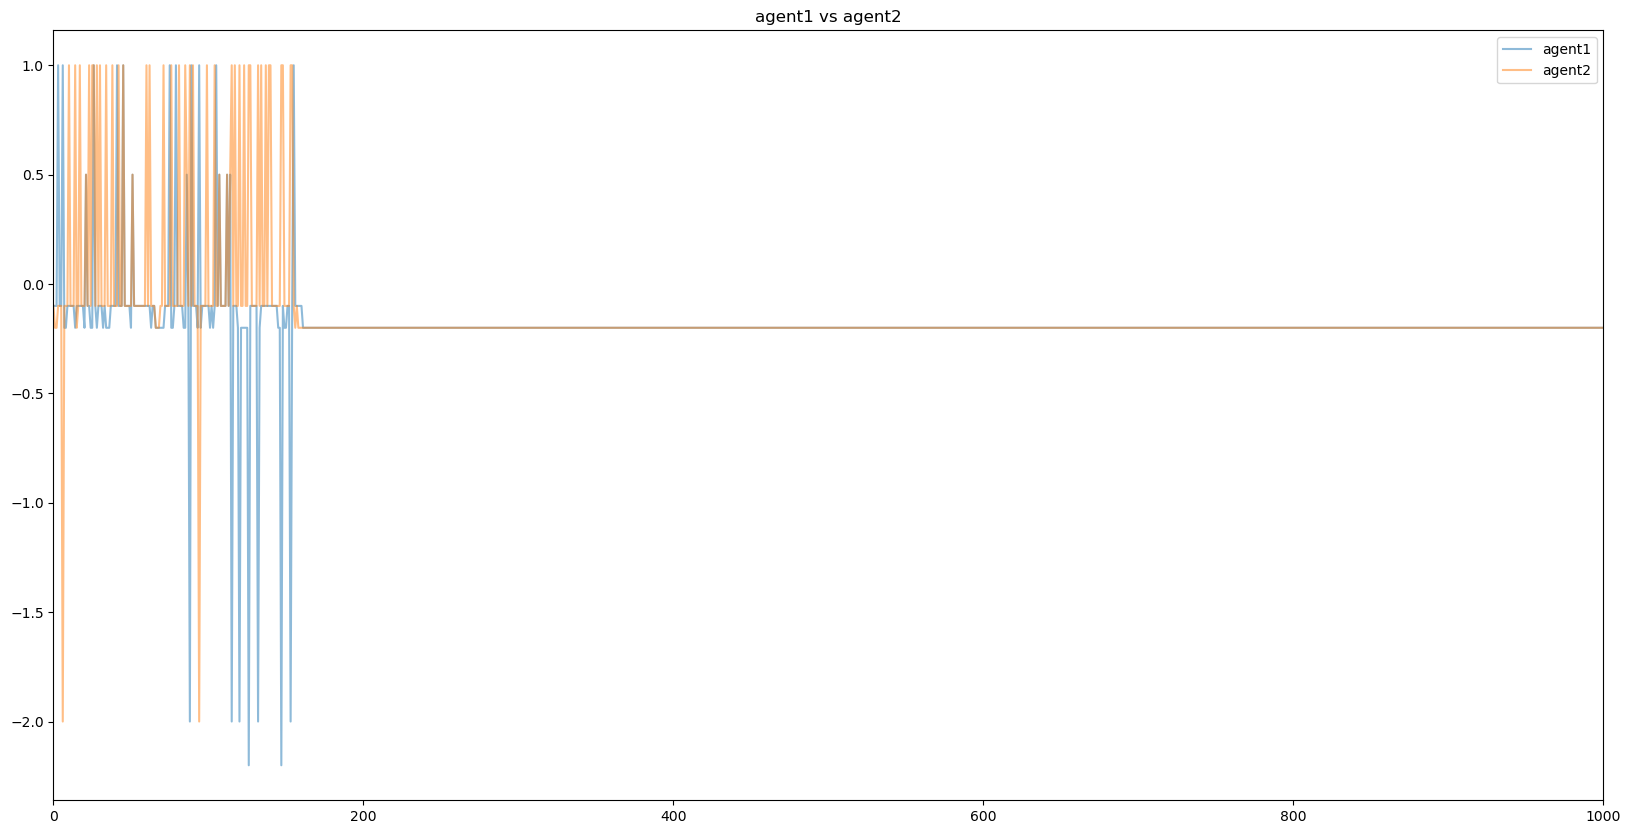

In [12]:
x = [i for i in range(0, agent1.play_times)]
plt.figure(figsize=(20, 10))
plt.plot(x, agent1_reward, label=agent1.name, alpha=0.5)
plt.plot(x, agent2_reward, label=agent2.name, alpha=0.5)
# plt.plot(x, obj_cnt[1:], label='count', alpha=0.5)
plt.legend()
# plt.ylim(-0.5, 2)
plt.xlim(0, agent1.play_times)
plt.title(f'{agent1.name} vs {agent2.name}')
plt.show()

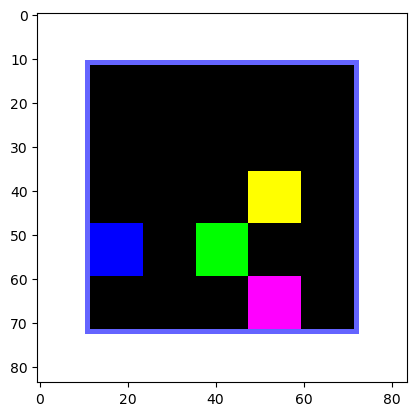

In [13]:
from PIL import Image, ImageDraw

for idx, img in enumerate(frames):
    image = np.array(Image.fromarray((img*255).astype(np.uint8)).convert('RGB'))
    image = Image.fromarray(image).resize(size=(84, 84), resample=Image.Resampling.NEAREST)
    drawer = ImageDraw.Draw(image)
    drawer.rectangle([(11,11),(72,72)], outline=(100, 100, 255), width=1)
    plt.imshow(np.array(image))
    frames[idx] = np.array(image)
    

In [15]:
import imageio
resized_frames = []
for frame in frames:
    resized_frames.append(Image.fromarray(frame).resize((256,256),resample=Image.NEAREST))
imageio.mimsave('demo.gif',resized_frames)

/tmp/ipykernel_2939342/618717601.py:4: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  resized_frames.append(Image.fromarray(frame).resize((256,256),resample=Image.NEAREST))


# Episodic DRQN

agent1: DuelDQN(
  (conv_layer1): Conv2d(1, 32, kernel_size=(3, 3), stride=(3, 3))
  (conv_layer2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv_layer3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (lstm_layer): LSTM(128, 128, batch_first=True)
  (relu): ReLU()
  (adv): Linear(in_features=128, out_features=4, bias=True)
  (val): Linear(in_features=128, out_features=1, bias=True)
)
agent2: DuelDQN(
  (conv_layer1): Conv2d(1, 32, kernel_size=(3, 3), stride=(3, 3))
  (conv_layer2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv_layer3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (lstm_layer): LSTM(128, 128, batch_first=True)
  (relu): ReLU()
  (adv): Linear(in_features=128, out_features=4, bias=True)
  (val): Linear(in_features=128, out_features=1, bias=True)
)


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Episode: 0
750 0.455


/ufs/haohui/anaconda3/lib/python3.9/site-packages/torch/nn/modules/rnn.py:774: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975993/work/aten/src/ATen/native/cudnn/RNN.cpp:968.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,
  5%|██▏                                         | 1/20 [00:45<14:23, 45.44s/it]

Total Reward: Agent 1: 110.9000000000006, Agent 2: 61.29999999999951
CC: 0, CD+DC: 38, DD: 0, ND: 51, DN: 65, NN: 455, NC: 193, CN: 198
agent1: total N: 699, total C: 236, total D: 65
agent2: total N: 718, total C: 231, total D: 51
Episode: 1
1300 0.41000000000000003


 10%|████▍                                       | 2/20 [01:26<12:53, 42.97s/it]

Total Reward: Agent 1: -10.400000000000684, Agent 2: -113.40000000000109
CC: 0, CD+DC: 11, DD: 0, ND: 13, DN: 26, NN: 802, NC: 75, CN: 73
agent1: total N: 890, total C: 84, total D: 26
agent2: total N: 901, total C: 86, total D: 13
Episode: 2
1950 0.36500000000000005


 15%|██████▌                                     | 3/20 [02:09<12:12, 43.08s/it]

Total Reward: Agent 1: 163.30000000000163, Agent 2: 43.39999999999943
CC: 0, CD+DC: 34, DD: 0, ND: 32, DN: 71, NN: 448, NC: 208, CN: 207
agent1: total N: 688, total C: 241, total D: 71
agent2: total N: 726, total C: 242, total D: 32
Episode: 3
2700 0.32000000000000006


 20%|████████▊                                   | 4/20 [02:55<11:42, 43.90s/it]

Total Reward: Agent 1: 163.6000000000017, Agent 2: 28.699999999999527
CC: 0, CD+DC: 39, DD: 0, ND: 39, DN: 77, NN: 442, NC: 193, CN: 210
agent1: total N: 674, total C: 249, total D: 77
agent2: total N: 729, total C: 232, total D: 39
Episode: 4
3300 0.2750000000000001


 25%|███████████                                 | 5/20 [03:37<10:52, 43.48s/it]

Total Reward: Agent 1: 177.10000000000178, Agent 2: 76.29999999999984
CC: 0, CD+DC: 49, DD: 0, ND: 32, DN: 63, NN: 422, NC: 214, CN: 220
agent1: total N: 668, total C: 269, total D: 63
agent2: total N: 705, total C: 263, total D: 32
Episode: 5
3950 0.2300000000000001


 30%|█████████████▏                              | 6/20 [04:21<10:08, 43.47s/it]

Total Reward: Agent 1: 127.70000000000108, Agent 2: 51.09999999999935
CC: 0, CD+DC: 30, DD: 0, ND: 52, DN: 73, NN: 437, NC: 198, CN: 210
agent1: total N: 687, total C: 240, total D: 73
agent2: total N: 720, total C: 228, total D: 52
Episode: 6
4800 0.1850000000000001


 35%|███████████████▍                            | 7/20 [05:08<09:42, 44.77s/it]

Total Reward: Agent 1: 131.5000000000015, Agent 2: 81.29999999999998
CC: 0, CD+DC: 25, DD: 0, ND: 42, DN: 61, NN: 441, NC: 220, CN: 211
agent1: total N: 703, total C: 236, total D: 61
agent2: total N: 713, total C: 245, total D: 42
Episode: 7
5600 0.14000000000000012


 40%|█████████████████▌                          | 8/20 [05:55<09:04, 45.41s/it]

Total Reward: Agent 1: 159.30000000000163, Agent 2: 8.50000000000002
CC: 0, CD+DC: 27, DD: 0, ND: 39, DN: 80, NN: 456, NC: 187, CN: 211
agent1: total N: 682, total C: 238, total D: 80
agent2: total N: 747, total C: 214, total D: 39
Episode: 8
6200 0.09500000000000013


 45%|███████████████████▊                        | 9/20 [06:38<08:10, 44.56s/it]

Total Reward: Agent 1: 164.00000000000207, Agent 2: 12.900000000000174
CC: 0, CD+DC: 23, DD: 0, ND: 41, DN: 89, NN: 429, NC: 206, CN: 212
agent1: total N: 676, total C: 235, total D: 89
agent2: total N: 730, total C: 229, total D: 41
Episode: 9
6800 0.1


 50%|█████████████████████▌                     | 10/20 [07:21<07:20, 44.07s/it]

Total Reward: Agent 1: 149.6000000000019, Agent 2: 28.599999999999365
CC: 0, CD+DC: 34, DD: 0, ND: 42, DN: 64, NN: 467, NC: 173, CN: 220
agent1: total N: 682, total C: 254, total D: 64
agent2: total N: 751, total C: 207, total D: 42
Episode: 10
7700 0.1


 55%|███████████████████████▋                   | 11/20 [08:09<06:49, 45.54s/it]

Total Reward: Agent 1: 118.60000000000119, Agent 2: 39.399999999999785
CC: 0, CD+DC: 28, DD: 0, ND: 51, DN: 76, NN: 450, NC: 196, CN: 199
agent1: total N: 697, total C: 227, total D: 76
agent2: total N: 725, total C: 224, total D: 51
Episode: 11
8450 0.1


 60%|█████████████████████████▊                 | 12/20 [08:56<06:06, 45.78s/it]

Total Reward: Agent 1: 71.50000000000007, Agent 2: -37.8000000000004
CC: 0, CD+DC: 20, DD: 0, ND: 22, DN: 49, NN: 613, NC: 136, CN: 160
agent1: total N: 771, total C: 180, total D: 49
agent2: total N: 822, total C: 156, total D: 22
Episode: 12
9200 0.1


 65%|███████████████████████████▉               | 13/20 [09:42<05:21, 45.88s/it]

Total Reward: Agent 1: 166.10000000000184, Agent 2: 47.09999999999956
CC: 0, CD+DC: 32, DD: 0, ND: 37, DN: 72, NN: 432, NC: 208, CN: 219
agent1: total N: 677, total C: 251, total D: 72
agent2: total N: 723, total C: 240, total D: 37
Episode: 13
10000 0.1


 70%|██████████████████████████████             | 14/20 [10:29<04:37, 46.21s/it]

Total Reward: Agent 1: -179.39999999999836, Agent 2: -173.79999999999868
CC: 0, CD+DC: 1, DD: 0, ND: 8, DN: 5, NN: 951, NC: 16, CN: 19
agent1: total N: 975, total C: 20, total D: 5
agent2: total N: 975, total C: 17, total D: 8
Episode: 14
10750 0.1


 75%|████████████████████████████████▎          | 15/20 [11:15<03:50, 46.17s/it]

Total Reward: Agent 1: 134.30000000000152, Agent 2: 49.09999999999923
CC: 0, CD+DC: 27, DD: 0, ND: 45, DN: 67, NN: 455, NC: 195, CN: 211
agent1: total N: 695, total C: 238, total D: 67
agent2: total N: 733, total C: 222, total D: 45
Episode: 15
11500 0.1


 80%|██████████████████████████████████▍        | 16/20 [12:01<03:04, 46.08s/it]

Total Reward: Agent 1: 117.10000000000147, Agent 2: 86.19999999999986
CC: 0, CD+DC: 17, DD: 0, ND: 48, DN: 54, NN: 452, NC: 210, CN: 219
agent1: total N: 710, total C: 236, total D: 54
agent2: total N: 725, total C: 227, total D: 48
Episode: 16
12250 0.1


 85%|████████████████████████████████████▌      | 17/20 [12:47<02:18, 46.06s/it]

Total Reward: Agent 1: 113.50000000000092, Agent 2: 68.59999999999987
CC: 0, CD+DC: 27, DD: 0, ND: 57, DN: 69, NN: 433, NC: 204, CN: 210
agent1: total N: 694, total C: 237, total D: 69
agent2: total N: 712, total C: 231, total D: 57
Episode: 17
12850 0.1


 90%|██████████████████████████████████████▋    | 18/20 [13:32<01:31, 45.68s/it]

Total Reward: Agent 1: 147.60000000000144, Agent 2: 74.9999999999999
CC: 0, CD+DC: 36, DD: 0, ND: 39, DN: 62, NN: 439, NC: 211, CN: 213
agent1: total N: 689, total C: 249, total D: 62
agent2: total N: 714, total C: 247, total D: 39
Episode: 18
13600 0.1


 95%|████████████████████████████████████████▊  | 19/20 [14:18<00:45, 45.84s/it]

Total Reward: Agent 1: 102.10000000000126, Agent 2: 40.49999999999929
CC: 0, CD+DC: 31, DD: 0, ND: 65, DN: 78, NN: 437, NC: 185, CN: 204
agent1: total N: 687, total C: 235, total D: 78
agent2: total N: 719, total C: 216, total D: 65
Episode: 19
14200 0.1


100%|███████████████████████████████████████████| 20/20 [15:01<00:00, 45.09s/it]

Total Reward: Agent 1: 172.20000000000195, Agent 2: 47.0999999999993
CC: 0, CD+DC: 39, DD: 0, ND: 30, DN: 65, NN: 451, NC: 200, CN: 215
agent1: total N: 681, total C: 254, total D: 65
agent2: total N: 731, total C: 239, total D: 30
Running time: 928.5366463661194


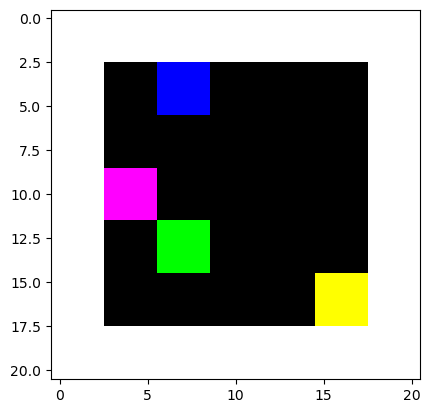

In [3]:
SETTLEMENT_PROB = 0.001
TOTAL_EPISODES = 20

start = time.time()
seed_everything()
config = {
    'reward': 3, 
    'sucker': 0, 
    'temptation': 5, 
    'punishment': 1, 
    'n_episodes': N_STEPS, 
    'discount': 0.99,
    'play_epsilon': 1,
    'select_epsilon': 1,
    'epsilon_decay': EPSILON_DECAY,
    'min_epsilon': 0.1,
    'alpha': 0.1,
    'n_actions': 4,
    'h': 8,
    'select_h': 5,
    'state_repr': 'bi',
    'batch_size': 64,
    'learning_rate': LEARNING_RATE/2,
}
seed_everything(42)

config = Config(config)
env = Coins(size=IMAGE_SIZE, config=config, image_dim=INPUT_IMAGE_DIM)

agent1_epi = initialize_agent('agent1', config)
agent2_epi = initialize_agent('agent2', config)
agent1_epi.policy_net.load_state_dict(torch.load('data/agent1_normal_drqn_weights.torch'))
agent2_epi.policy_net.load_state_dict(torch.load('data/agent2_normal_drqn_weights.torch'))
agent1_epi.target_net.load_state_dict(agent1_epi.policy_net.state_dict())
agent2_epi.target_net.load_state_dict(agent2_epi.policy_net.state_dict())

fill_memory(agent1_epi, agent2_epi, env, config)

agent1_epi.policy.epsilon = 0.5
agent2_epi.policy.epsilon = 0.5

for ep in tqdm(range(TOTAL_EPISODES)):
    episodic_drqn(agent1_epi, agent2_epi, env, config, settlement_prob=SETTLEMENT_PROB, total_episodes=TOTAL_EPISODES)
    print(f'Episode: {ep}')
    print(agent1_epi.updating_times, agent1_epi.policy.epsilon)
    frames, agent1_reward, agent2_reward, obj_cnt = test_policy(copy.deepcopy(agent1_epi), copy.deepcopy(agent2_epi), env)
    show_result(agent1_reward, agent2_reward)
    
end = time.time()
print(f'Running time: {end-start}')

agent1: DuelDQN(
  (conv_layer1): Conv2d(1, 32, kernel_size=(3, 3), stride=(3, 3))
  (conv_layer2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv_layer3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (lstm_layer): LSTM(128, 128, batch_first=True)
  (relu): ReLU()
  (adv): Linear(in_features=128, out_features=4, bias=True)
  (val): Linear(in_features=128, out_features=1, bias=True)
)
agent2: DuelDQN(
  (conv_layer1): Conv2d(1, 32, kernel_size=(3, 3), stride=(3, 3))
  (conv_layer2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv_layer3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (lstm_layer): LSTM(128, 128, batch_first=True)
  (relu): ReLU()
  (adv): Linear(in_features=128, out_features=4, bias=True)
  (val): Linear(in_features=128, out_features=1, bias=True)
)
Total Reward: Agent 1: 131.90000000000165, Agent 2: 0.9000000000000689


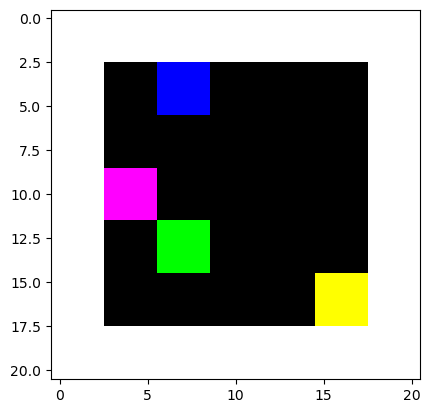

In [3]:
frames, agent1_reward, agent2_reward, obj_cnt = test_policy(agent1_epi, agent2_epi, env)